In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

<h2> Ex. 5,7. Having the empirical or generated data $X^n = \{X_1,...,X_n \}$ reorder the data as $X_{(1)} \le X_{(2)} \le ... \le X_{(n)}$.

Calculate and compare the following estimates of the tail index of your data. Investigate the sign of an estimate and make conclusion regarding the heavy tails. 
* Hill's estimator 
$$
\gamma_{n,k} = \frac{1}{k}\sum_{i=1}^k \ln X_{(n-i+1)} - \ln X_{(n-k)} 
$$
for some $k = 1,..., n-1$
* Ratio estimator 
$$
a_n = a_n(x_n) = \sum_{i=1}^n
$$

In [2]:
def hills_estimator(X):
    n = X.size
    res = np.zeros(n-2)
    for k in range(1, n-1):
        sum = 0.0
        for i in range(1,k):
            sum += np.log(X[n-i+1 -1]) - np.log(X[n-k - 1])
        res[k-1] = sum/k
    return res

In [3]:
def ratio_estimator(X, xn):
    sum = 0
    number = 0
    for x in X:
        if (x > xn):
            sum += np.log(x/xn)
            number += 1
    return sum/number

In [4]:
def Pickards_estimator(X, k):
    n = X.size
    return (1/np.log(2))*np.log((X[n-k+1] - X[n-2*k+1])/(X[n-2*k+1] - X[n-4*k+1]))

In [5]:
def Frechet(U, gamma):     
    return np.power((-np.log(U)), -gamma)/gamma

In [6]:
S = 1000
lognorm = np.random.lognormal(mean = 5, sigma = 10, size = S)
U = np.random.uniform(0, 1, S)
frechet_2 = Frechet(U, 2)
frechet_5 = Frechet(U, 5)
frechet_10 = Frechet(U, 10)
expon = np.random.exponential(scale = 5, size = S)
norm = np.random.normal(size = S)

In [7]:
lognorm_hill = hills_estimator(np.sort(lognorm))
expon_hill = hills_estimator(np.sort(expon))
frechet_2_hill = hills_estimator(np.sort(frechet_2))
frechet_5_hill = hills_estimator(np.sort(frechet_5))
frechet_10_hill = hills_estimator(np.sort(frechet_10))
U_hill = hills_estimator(np.sort(U))

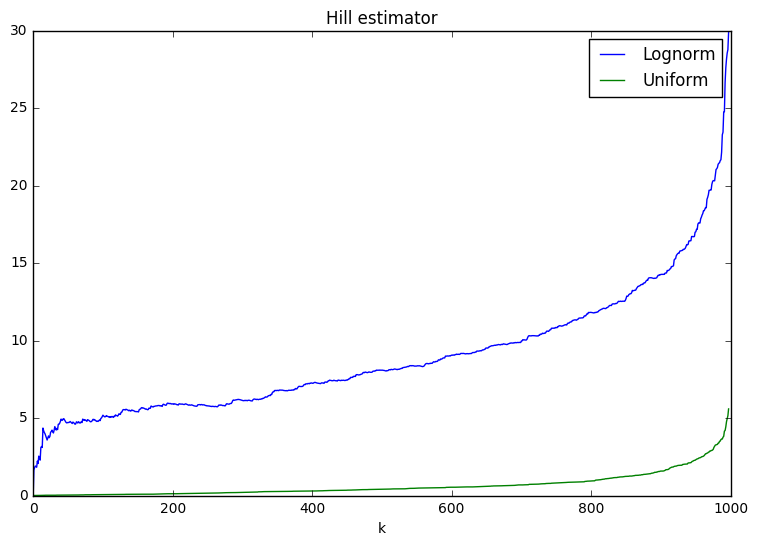

In [8]:
plt.figure(figsize=(9,6))
plt.plot(lognorm_hill, label='Lognorm')
plt.plot(U_hill, label = 'Uniform')
plt.xlabel('k')
plt.title('Hill estimator')
plt.legend()
plt.show()

<h3>We see that estimator is positive for heavy-tailed lognormal distribution. But how accurate is it? Let's look at the distribution with known tail index.

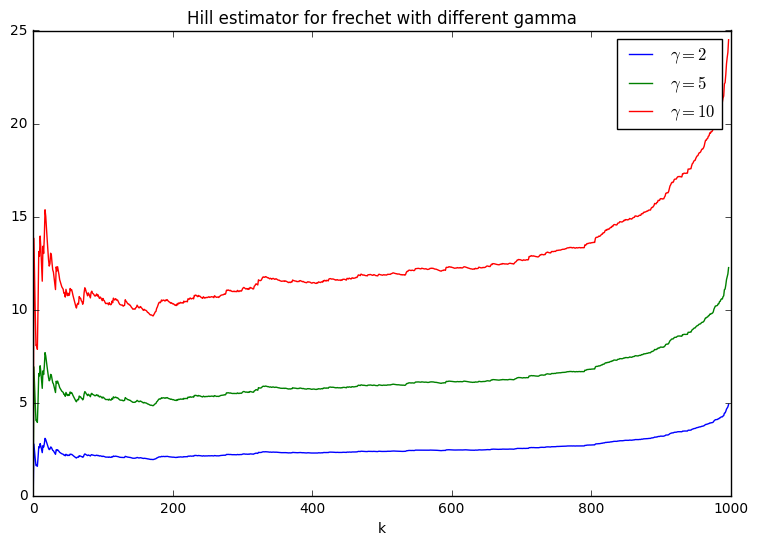

In [9]:
plt.figure(figsize=(9,6))
plt.plot(frechet_2_hill, label = '$\gamma = 2$')
plt.plot(frechet_5_hill, label = '$\gamma = 5$')
plt.plot(frechet_10_hill, label = '$\gamma = 10$')
plt.title('Hill estimator for frechet with different gamma')
plt.xlabel('k')
plt.legend()
plt.show()

<h3>Wonderful! We see that Hill's estimator actually shows $\gamma$ ! Now, let's look at ratio estimator.

In [10]:
print 'Ratio estimator for frechet with gamma 10 equals %s' % ratio_estimator(frechet_10, frechet_10[2])
print 'Or %s' % ratio_estimator(frechet_10, frechet_10[10])
print 'Or %s\n' % ratio_estimator(frechet_10, frechet_10[30])
print 'Ratio estimator for frechet with gamma 5 equals %s' % ratio_estimator(frechet_5, frechet_5[2])
print 'Or %s' % ratio_estimator(frechet_5, frechet_5[10])
print 'Or %s\n' % ratio_estimator(frechet_5, frechet_5[30])
print 'Ratio estimator for frechet with gamma 2 equals %s' % ratio_estimator(frechet_2, frechet_2[2])
print 'Or %s' % ratio_estimator(frechet_2, frechet_2[10])
print 'Or %s' % ratio_estimator(frechet_2, frechet_2[30])

Ratio estimator for frechet with gamma 10 equals 10.2090210859
Or 17.0101625639
Or 12.2334861755

Ratio estimator for frechet with gamma 5 equals 5.10451054294
Or 8.50508128194
Or 6.11674308777

Ratio estimator for frechet with gamma 2 equals 2.04180421718
Or 3.40203251278
Or 2.44669723511


<h3> And Pickand's:

In [13]:
n = S
print 'Pickands estimator for frechet with gamma 10 equals %s' % Pickards_estimator(frechet_10, n/100)
print 'Or %s' % Pickards_estimator(frechet_10, n/10)
print 'Pickands estimator for frechet with gamma 5 equals %s' % Pickards_estimator(frechet_5, n/100)
print 'Or %s' % Pickards_estimator(frechet_5, n/10)
print 'Pickands estimator for frechet with gamma 2 equals %s' % Pickards_estimator(frechet_2, n/100)
print 'Or %s' % Pickards_estimator(frechet_2, n/10)

Pickands estimator for frechet with gamma 10 equals 9.14526310631
Or 8.8540627069
Pickands estimator for frechet with gamma 5 equals 6.03213221534
Or 4.38174987044
Pickands estimator for frechet with gamma 2 equals 4.43778707601
Or 1.56966609955
